**Lab 3: Spectral Representation**

The goal of this lab is to gain familiarity with the spectral representations of signals, specially the spectrograms.

In [103]:
import os
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
from IPython.display import Audio

from util import load_audio, plot_signals, plot_spectrogram, plot_mean_spectrogram, plot_spectrum_at

First upload your reference signal and plot the first seconds of it.

In [104]:
# Write the code here
folder = "audio/"
ref, fs = load_audio(folder + "piano-a4-sound.wav")

# **Exercises**

**1. Spectrograms**

A spectrogram is obtained by estimating the frequency content in short sections of the signal. The magnitude of the spectrum over individual sections is plotted as intensity or color on a two-dimensional plot versus frequency and time. The length of each section, or window length, determines the frequency resolution. Longer windows give good frequency resolution but fail to
track frequency changes well. Shorter windows have poor frequency resolution, but good tracking.

In Python the function `spectrogram` from the `scipy.signal` package will
compute the spectrogram. A common call to the function is defined as follows. No need to understand the meaning of each parameter at this stage. Note that we provide the `plot_spectrogram` function to plot the spectrogram.

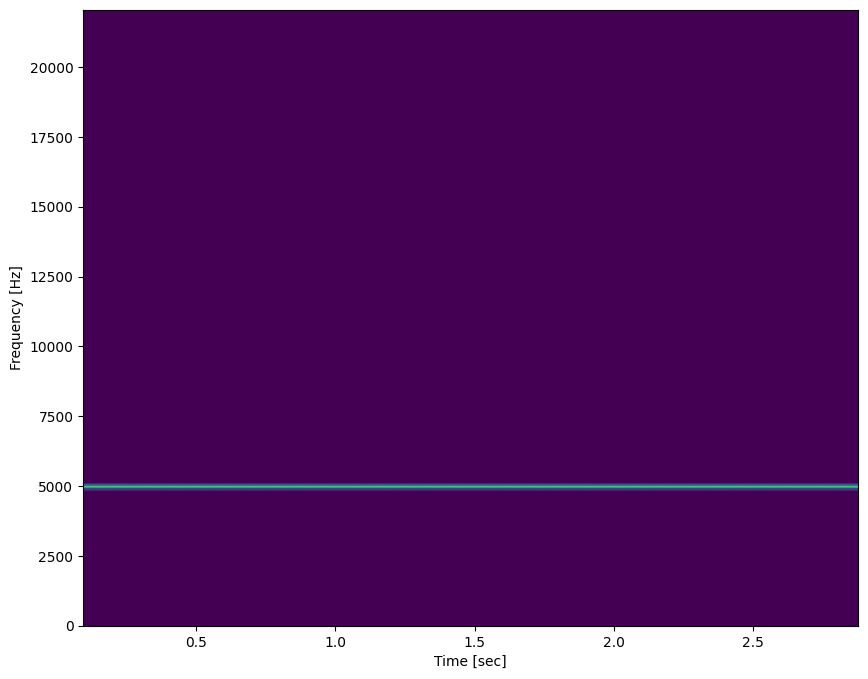

In [105]:
from scipy import signal

#define signal
A = 0.8
f0 = 5000.0
phi = np.pi/2
fs = 44100
t = np.arange(0, 3, 1.0/fs)
x = A * np.cos(2*np.pi*f0*t + phi)

# calculate the spectrogram
window_length = 8192
ff, tt, S = signal.spectrogram(x, fs, nperseg=window_length, noverlap=window_length/2)

# plot the spectrogram
plt.figure(figsize=(10,8))
plot_spectrogram(ff, tt, S)
plt.show()

We can plot the spectrum (one slice of the spectrogram) of the signal at an specific time using the `plot_spectrum_at` function. For instance, we can see the spectrum of the signal at the 0.5 seconds:

In [106]:
plot_spectrum_at(ff, tt, S, 0.5)

1.1. Calculate and plot the spectrogram of your reference signal. Use `plt.ylim` to select the limits of the y axis in order to zoom in the frequency region of interest. For instance if you want to see the region between 0 and 4000 Hz, you can call `plt.ylim([0, 4000])` after the `plot_spectrogram` function.


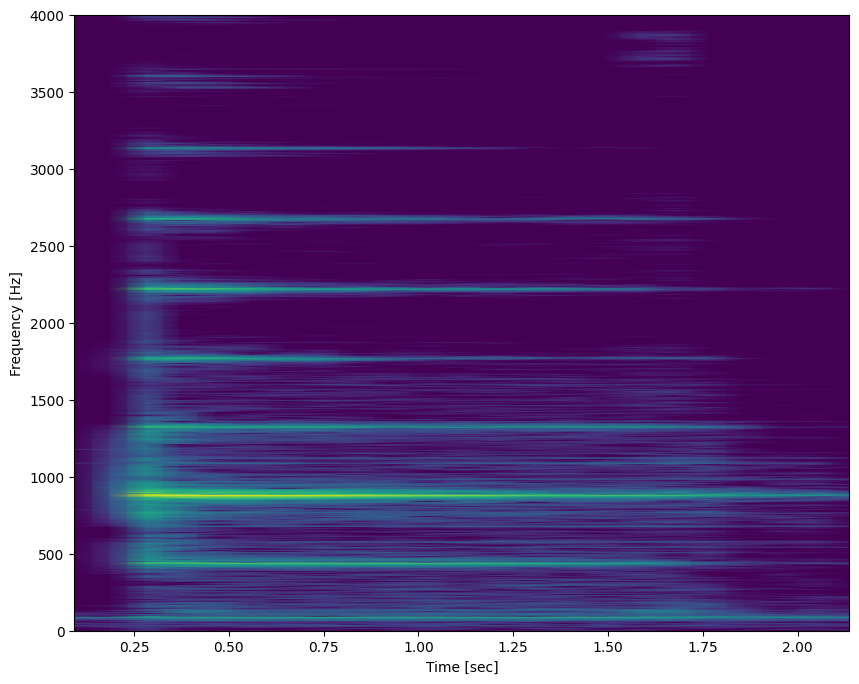

In [107]:
# Write the code here

# calculate the spectrogram
window_length = 8192
ff, tt, S = signal.spectrogram(ref, fs, nperseg=window_length, noverlap=window_length/2)

# plot the spectrogram
plt.figure(figsize=(10,8))
plot_spectrogram(ff, tt, S)
plt.ylim([0, 4000])
plt.show()

1.2. Select a time where almost all harmonics are present and plot the spectrum at that time.

In [108]:
# Write the code here
plot_spectrum_at(ff, tt, S, 0.5)

1.3. Use the cursor for measuring the weights of the fundamental frequency and some harmonics (6-10)

In [109]:
# Frequency-Amplitude pairs
spectrum = np.array([
    [441.43, 0.1292],
    [882.86, 1.0000],
    [1324.3, 0.04595],
    [1771.1, 0.04656],
    [2223.3, 0.09470],
    [2675.5, 0.04684],
    [3138.5, 0.009089],
    [3601.4, 0.002395],
    [3999.8, 0.001157]
])

# Only the amplitudes
weights = spectrum[:, 1]

**2. Synthesis**:

Let's define a function to synthetize an harmonic singal which receives the fundamental frequency ($f_0$) and the weights ($A_k$) of each harmonic and the time vector ($t$). This is similar to what you did in Lab 3- Ex3.2.


In [110]:
def synthesize(f0, phi, Ak, t):
  y = 0
  for k in range(1, 9 + 1):
    y += Ak[k-1] * np.cos(2*np.pi*k*f0*t + k*phi - (k-1)*np.pi/2)
  return y

2.1. Use the `synthetize` function to generate a synthesis with the weights ($A_k$) found in 1.3 and the fundamental frequency and phases found in previous labs. Plot both the reference and the synthetize signal. Listen to the synthetize signal.

In [111]:
# Write the code here
y = synthesize(f0=440, phi=np.pi + 0.9, Ak=weights, t=np.arange(0, 2, 1.0/fs))

A0 = 0.16
T0 = 1/440
num_periods = 5
t_start = 0.5
t_end = t_start + T0*num_periods

y = A0 * (y / np.max(y))

plot_signals([ref, y], fs, t_start=t_start, t_end=t_end, name=['Reference', 'Synthesis'])

2.2. Calculate the spectrogram of the synthesized signal `S_synt`; and compare the spectrums of both signals at the same time using `plot_spectrum_at(ff, tt, [S_ref, S_synt], time)`, where `S_ref`is spectrogram of the reference signal.

**Note:** use the same window length to calculate both spectrograms.

In [112]:
# Write the code here
ff, tt, S_ref = signal.spectrogram(ref, fs, nperseg=window_length, noverlap=window_length/2)
_ff, _tt, S_synt = signal.spectrogram(y, fs, nperseg=window_length, noverlap=window_length/2)

# plot the spectrum
plot_spectrum_at(ff, tt, [S_ref, S_synt], 0.5)

As we can see, the first frequencies of the synthetysed signal (1) (from the fundamental one to the ninth one), are quite similar. We have used 9 frequency weights from the original signal, but we could have used as many as we wanted, and the new signal would have been more accurate.

The first difference between both signals is that before the fundamental frequency, in the original signal there's a peak at f= 91Hz. This occurs as a consequence of all frequencies of the reference signal, or it can be just noise.

Another difference is that we can see after the tenth harmonic, our new signal doesn't have any amplitude for the upcoming frequencies, whereas in the original one we observe not so distinguished amplitude peaks for each harmonic frequency.

And the last difference can be the variations between the theoretical and the sampled harmonic frequency values. For example, the fundamental harmonic frequency should be 440 Hz, but we have obtained 441.43 Hz.


2.3. Compare the spectrograms of the two signals. What are the main differences?

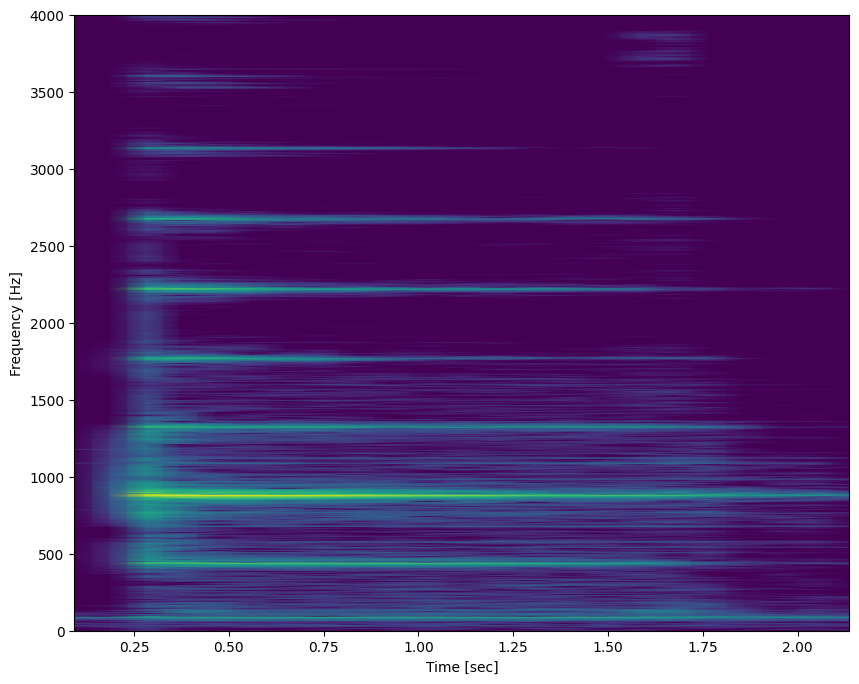

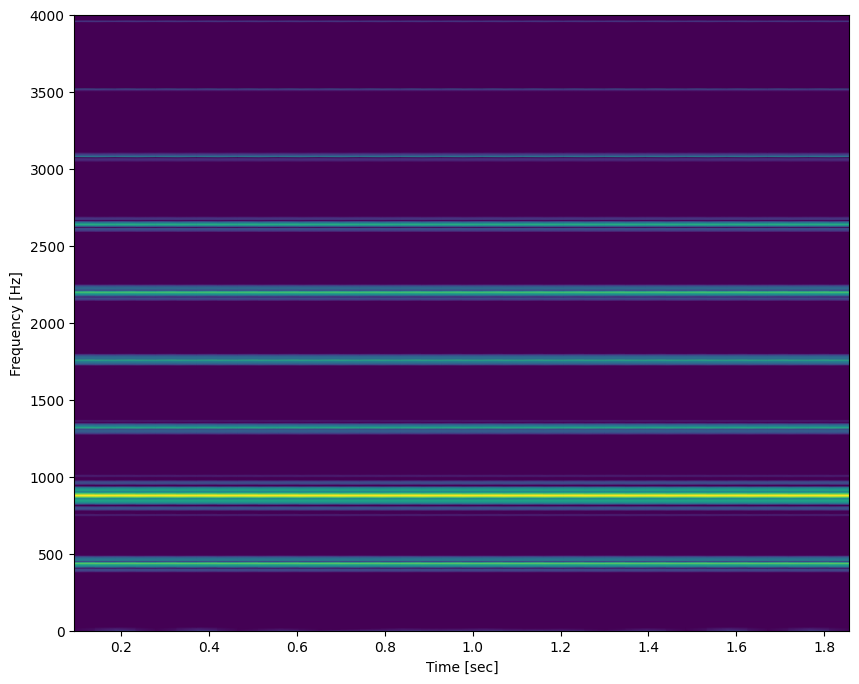

In [113]:
# plot the spectrogram
plt.figure(figsize=(10,8))
plot_spectrogram(ff, tt, S_ref)
plt.ylim([0, 4000])
plt.show()

# plot the spectrogram
plt.figure(figsize=(10,8))
plot_spectrogram(_ff, _tt, S_synt)
plt.ylim([0, 4000])
plt.show()

We can see that in the synthetysed signal, the frequency lines are more distinguishable, and clearly visible at which values are situated. 

In the other hand, in the reference signal we can observe some noise between the harmonics, and the more frequency value we have, the more blurred the amplitude of that frequency is.

Furthermore, we can also observe in the reference signal some constant amplitude at frequencies surrounding 90 Hz. This also happens in the spectrum plot of the previous exercice; it can be simply noise.

2.4. Listen to the two audios (reference and synthesized). What are the main differences?

In [114]:
# Our Original Audio
Audio(ref, rate=fs)

In [115]:
# Our Sintyetised Audio
Audio(y, rate=fs)

The percieved sound looks very similar between both signals. However, we have different signals.

The first difference is that the is that our original signal has a high attack and attenuation, but our sinthetysed signals has a constant sound, without contrasts. 

Also, now we have noticed another difference that in the previous lab we have not noticed. We can see that the noise we have observed graphically in spectrogram plot of the reference signal it can also be listen.